In [1]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__)
print('\n')
print(x.shape)
print('\n')
print(x.ndim)

<class 'numpy.ndarray'>


(3,)


1


In [2]:
W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

(2, 3)
2


In [3]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

print(W + X)
print('\n')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]


[[ 0  2  6]
 [12 20 30]]


In [4]:
A = np.array([[1,2], [3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [5]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [6]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

np.int64(32)

In [7]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [8]:
import numpy as np

W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x, W1) + b1

print(W1)
print('\n')
print(b1)
print('\n')
print(x)
print('\n')
print(h)

[[-0.03255251  0.82259512 -0.33493839  1.90326859]
 [ 0.14873811 -1.74727304  1.24124132  0.65418717]]


[ 0.93950447 -1.16474562  1.29660713  0.79363668]


[[-2.30151953 -0.20832877]
 [ 1.49741246 -0.64897636]
 [ 0.17651927  0.11967727]
 [ 0.36175075  0.3109374 ]
 [-0.41140707  0.38636441]
 [-0.15656172 -0.57897992]
 [ 1.59539039 -0.53432117]
 [-1.34678536  0.74557925]
 [-0.88247405  0.11033552]
 [ 0.66165116  0.32285671]]


[[ 0.98343828 -2.69395713  1.8088881  -3.72305917]
 [ 0.79423243  1.20095746 -0.01047006  3.21906278]
 [ 0.9515589  -1.22865059  1.38603242  1.2078916 ]
 [ 0.97397682 -1.41046376  1.56139127  1.68555677]
 [ 1.01036392 -2.17825118  1.91397462  0.26337317]
 [ 0.85848457 -0.28189652  0.63039186  0.11689643]
 [ 0.80809659  1.08121971  0.09902813  3.48054704]
 [ 1.09424176 -3.57533521  2.67314102 -1.28190921]
 [ 0.98464231 -2.08345074  1.72913457 -0.81376839]
 [ 0.96598716 -1.18459342  1.47573784  2.26414526]]


In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1 #hidden layer
a = sigmoid(h) # activation function
s = np.matmul(a, W2) + b2 #score

In [10]:
a.shape

(10, 4)

In [11]:
s

array([[1.7419271 , 0.47665023, 1.64283774],
       [1.92711417, 0.55454707, 1.25609578],
       [2.2128888 , 0.609932  , 0.73895671],
       [1.8489707 , 0.52029843, 1.34274496],
       [1.91817399, 0.53921498, 1.19517954],
       [1.67493769, 0.46202723, 1.72320622],
       [1.74136855, 0.47172963, 1.62234054],
       [2.53174519, 0.66414473, 0.07189485],
       [1.82136607, 0.50112484, 1.44875369],
       [1.94118768, 0.54826487, 1.20622928]])

## 순전파 구현

In [12]:
import numpy as np

class Sigmoid:
    def __init__(self): # 생성자(constructor) : 클래스의 인스턴스 생성(객체 만들 때) 자동으로 호출되어 객체의 초기 상태를 설정
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b 
        return out


In [13]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [14]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
s.shape

(10, 3)

In [15]:
import numpy as np

D, N = 8, 7

x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0) # 순전파
dy = np.random.randn(N,D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) # 역전파


In [16]:
D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis=0, keepdims=True) # 순전파

dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0) # 역전파 


In [17]:
class MatMul:
    def __init__(self, W):
        self.params = [W] # W(가중치 행렬)을 리스트로 저장
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW #[...] : 생략 기호 => 넘파이 배열이 가리키는 메모리 위치를 고정시킨 다음 그 위치에 원소 덮어쓰기
        return dx

In [18]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # sigmoid의 미분 결과
        return dx

In [19]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


## 확률적 경사 하강법(SGD)

In [20]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # 학습률

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [21]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape) #입력
print('t', t.shape) #정답

x (300, 2)
t (300, 3)


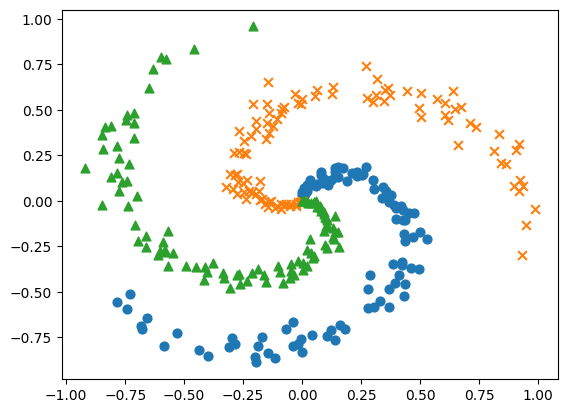

In [22]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']

for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i]) # x 에서 첫번째 컬럼 , x 의 두번째 컬럼

plt.show()

In [24]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H) # 가중치를 작은 무작위 값으로 설정하기 위해 0.01 곱함 => 학습 성능 향상 기대 가능
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x 
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [27]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from tqdm import tqdm


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size= 10
learning_rate = 1.0

# 데이터 읽기, 모델 및 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용할 변수 정의
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    #데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size : (iters+1)*batch_size]
        batch_t = t[iters*batch_size : (iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 결과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f' % (epoch + 1, iters + 1 , max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


100%|██████████| 300/300 [00:00<00:00, 2355.79it/s]

| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

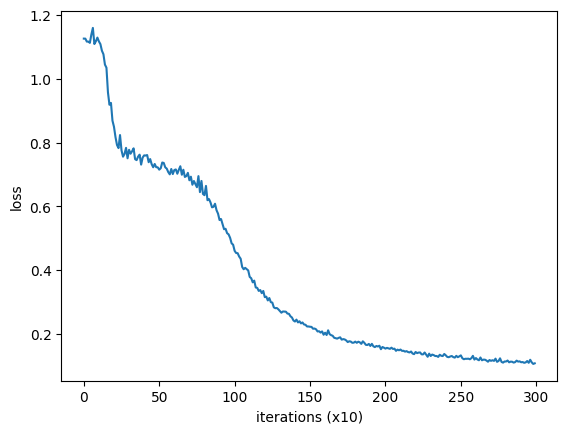

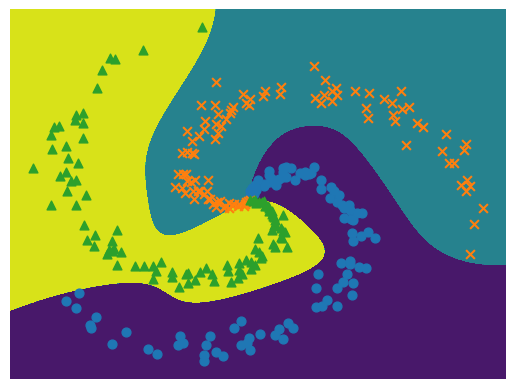

In [30]:
# 학습 결과 플롯

plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001

x_min, x_max = x[:,0].min() - .1 , x[:, 0].max() + .1
y_min, y_max = x[:,1].min() - .1 , x[:, 1].max() + .1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # 2차원 격자 생성
X = np.c_[xx.ravel(), yy.ravel()] # np.c_ : 배열을 열단위로 연결, ravel : 2차원 -> 1차원 평탄화
score = model.predict(X)

predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']

for i in range(CLS_NUM):
    plt.scatter(x[i*N : (i+1)*N, 0], x[i*N : (i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

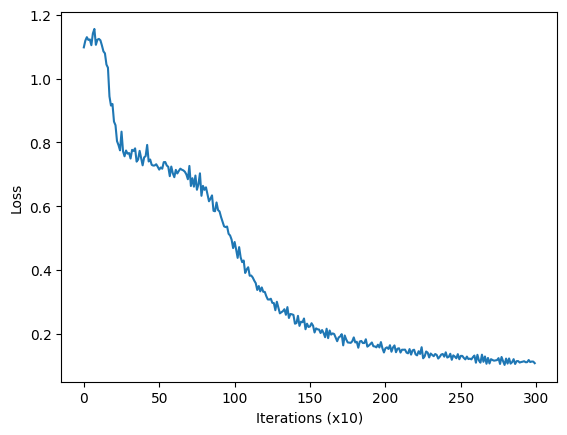

In [32]:
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10 # hidden layer 에 포함된 뉴런(노드) 개수
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

In [33]:
import numpy as np

a = np.random.randn(3)
a.dtype

dtype('float64')

In [34]:
# 64비트 부동소수점 수(표준)를 32비트로 변경(메모리 절약)

b = np.random.randn(3).astype(np.float32)
c = np.random.randn(3).astype('f')

print(b.dtype)
print(c.dtype)

float32
float32
